In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *
import matplotliba
import warnings
import seaborn as sns

### load predicted behaviors

In [2]:
behaviors = load_behaviors('../processed_dataset/behaviors.pkl')

In [3]:
def get_duration_bouts(predict, behavior_classes, framerate=60):
    behav_durations = []
    bout_start_idx = np.where(np.diff(np.hstack([-1, predict])) != 0)[0]
    bout_durations = np.hstack([np.diff(bout_start_idx), len(predict) - np.max(bout_start_idx)])
    bout_start_label = predict[bout_start_idx]
    for b, behavior_name in enumerate(behavior_classes):
        idx_b = np.where(bout_start_label == int(b))[0]
        if len(idx_b) > 0:
            behav_durations.append(bout_durations[idx_b]/framerate)
        else:
            a = np.empty((1,))
            a[:] = np.nan
            behav_durations.append(a)
    return behav_durations

In [4]:
import numpy as np

def get_individual_file_durations(predict, framerate=60):
    bout_start_idx = np.where(np.diff(np.hstack([-1, predict])) != 0)[0]
    bout_durations = np.hstack([np.diff(bout_start_idx), len(predict) - np.max(bout_start_idx)])
    bout_start_label = predict[bout_start_idx]
    
    individual_durations = []
    for i in range(len(bout_start_idx)):
        start = bout_start_idx[i] / framerate
        end = (bout_start_idx[i] + bout_durations[i]) / framerate
        individual_durations.append((start, end))
    
    return individual_durations

def get_duration_bouts(predict, behavior_classes, framerate=60):
    behav_durations = []
    individual_file_durations = []
    bout_start_idx = np.where(np.diff(np.hstack([-1, predict])) != 0)[0]
    bout_durations = np.hstack([np.diff(bout_start_idx), len(predict) - np.max(bout_start_idx)])
    bout_start_label = predict[bout_start_idx]
    
    for b, behavior_name in enumerate(behavior_classes):
        idx_b = np.where(bout_start_label == int(b))[0]
        if len(idx_b) > 0:
            behav_durations.append(bout_durations[idx_b]/framerate)
        else:
            a = np.empty((1,))
            a[:] = np.nan
            behav_durations.append(a)
    
    for i in range(len(bout_start_idx)):
        start = bout_start_idx[i] / framerate
        end = (bout_start_idx[i] + bout_durations[i]) / framerate
        individual_file_durations.append((start, end))
    
    return behav_durations, individual_file_durations

# Rest of your code remains unchanged


### plot male -- Group (row) x Condition (column)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

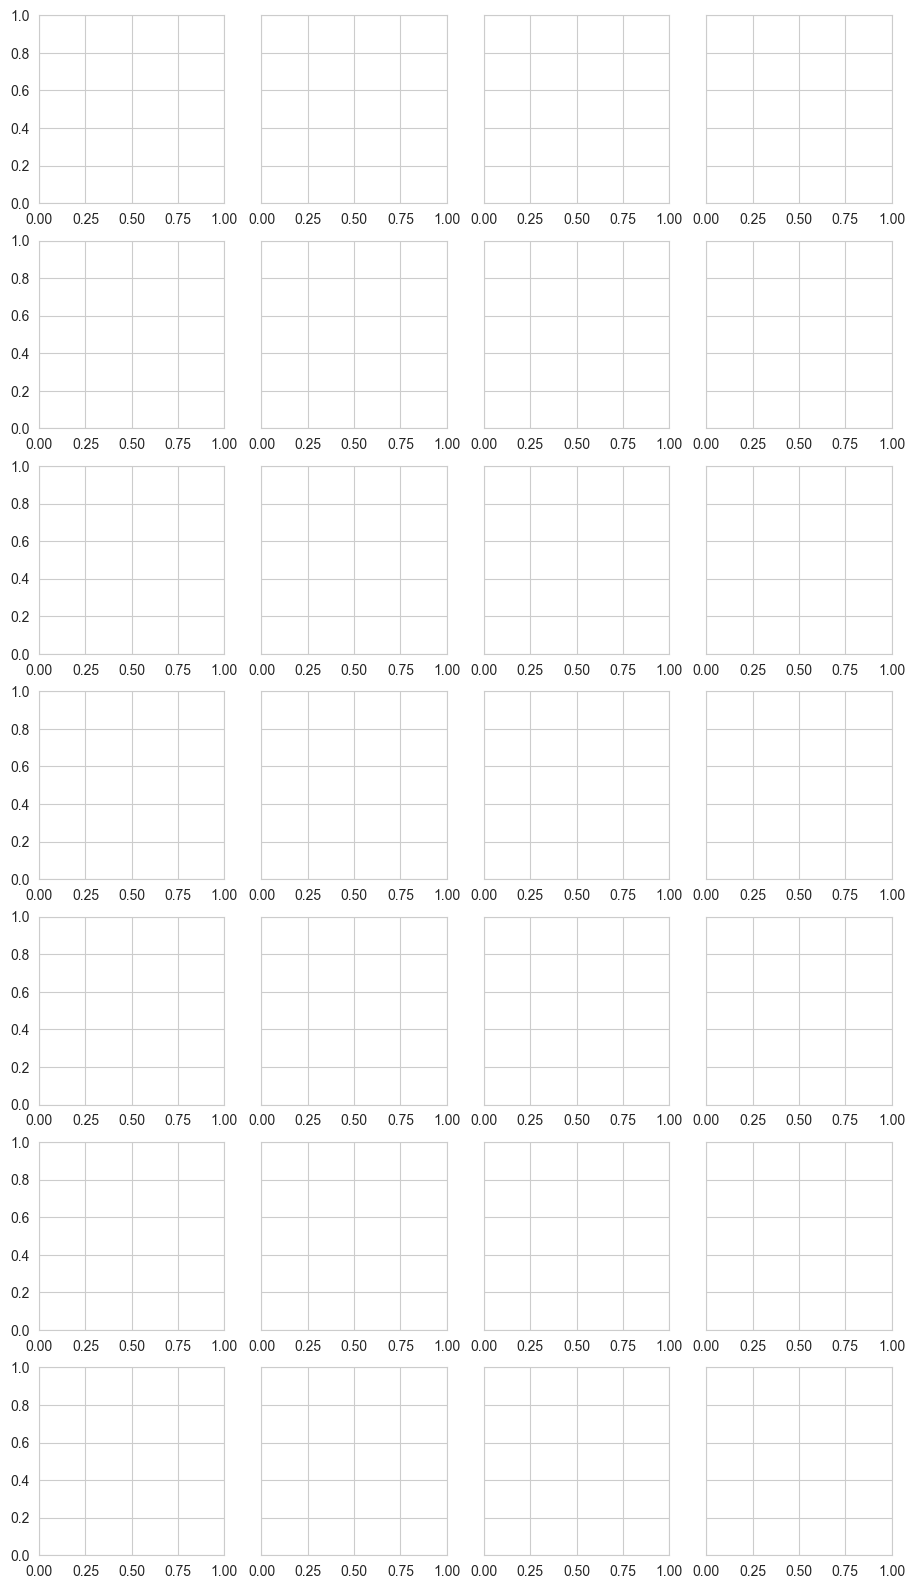

In [5]:
selected_sex = 'Male'
rows = len(groups)
cols = len(conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(11, 20), sharex=False, sharey=True)
for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(conditions)
        
    for col in range(cols):
        
        selected_group = groups[row]
        if selected_group == 'Group6':
            selected_condition = conditions_extra[0]
        elif selected_group == 'Group7':
            selected_condition = conditions_extra[1]
        else:
            selected_condition = conditions[col]
        
        durations_ = []
        for f in range(len(behaviors[selected_sex][selected_group][selected_condition])):
            durations_.append(get_duration_bouts(behaviors[selected_sex][selected_group][selected_condition][f'file{f}'], behavior_names))
        durations_dict = {'behavior': np.hstack([np.hstack([np.repeat(behavior_names[i],
                                                           len(durations_[f][i])) 
                                                 for i in range(len(durations_[f]))]) for f in range(len(durations_))]),
                          'duration': np.hstack([np.hstack(durations_[f]) for f in range(len(durations_))]),
                          }
        durations_df = pd.DataFrame(durations_dict)
        durations_df.to_csv(f'../processed_dataset/behavior_instance_durations/behavior_durations_{selected_sex}_{groups[row]}_{conditions[col]}.csv')

        sns.boxplot(durations_df, x='duration', y='behavior', hue='behavior', 
                    orient='h', width=0.6,
                    palette=behavior_colors, showfliers=False, ax=ax[row, col])
        ax[row, col].set_ylabel('')
        ax[row, col].set_xlabel('')
        
        if col == 1 or col == 2:
            if row == 4:
                ax[row, col].set_xlabel('Behavior duration (s)')
        
                
        if row == rows-1:
            ax[row, col].set_xlabel('Behavior duration (s)')

plt.show()

In [6]:
# Assuming selected_sex, selected_group, and selected_condition are already defined

# Access the dictionary corresponding to the selected sex
selected_sex_dict = behaviors[selected_sex]

# Access the dictionary corresponding to the selected group within the selected sex
selected_group_dict = selected_sex_dict[selected_group]

# Access the dictionary corresponding to the selected condition within the selected group
selected_condition_dict = selected_group_dict[selected_condition]

# Access the individual file data for durations of behaviors
for file_key, file_data in selected_condition_dict.items():
    # Here, file_key is the identifier for each file, and file_data contains the durations of behaviors for that file
    print(f"File {file_key}: {file_data}")


File file0: [2 2 2 ... 2 2 2]
File file1: [1 1 1 ... 2 2 2]
File file2: [2 2 2 ... 1 1 1]
File file3: [0 0 0 ... 1 1 1]
File file4: [1 1 1 ... 3 3 3]
File file5: [1 1 1 ... 0 0 0]
File file6: [1 1 1 ... 2 2 2]
File file7: [1 1 1 ... 3 3 3]
File file8: [1 1 1 ... 1 1 1]
File file9: [1 1 1 ... 1 1 1]


### file save, change the extension to change the file format

In [5]:
fig.savefig(f'../figures/behavior_durations_{selected_sex}.svg', 
            dpi=600, bbox_inches='tight')

### Female -- Group x Condition

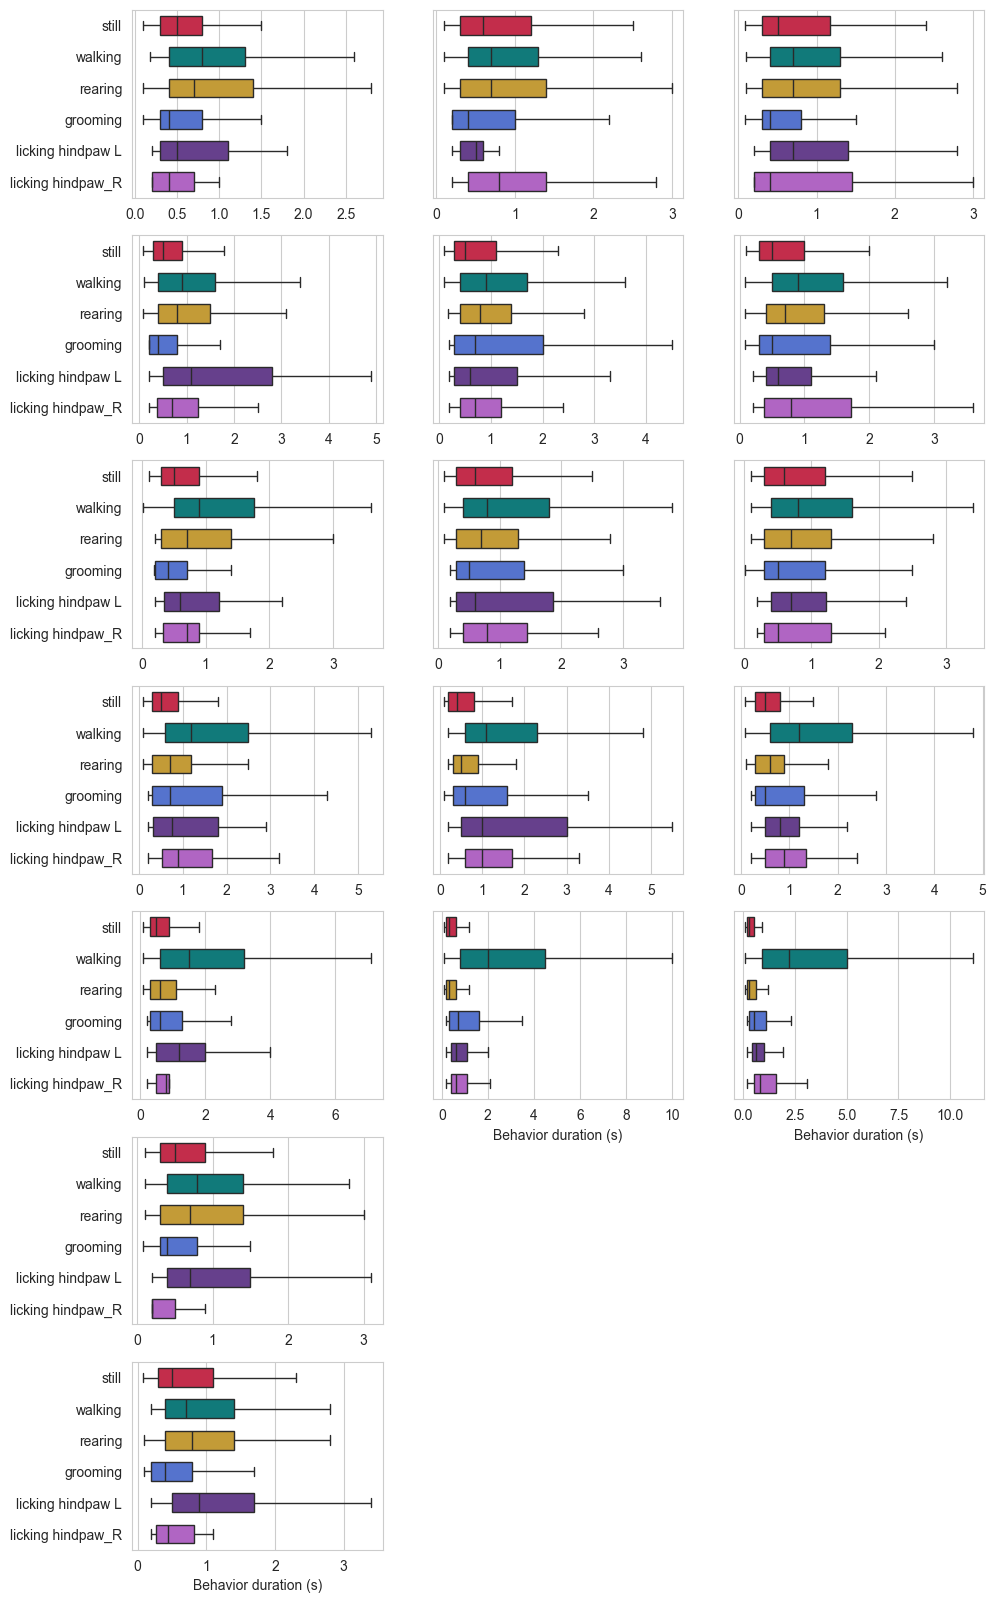

In [6]:
selected_sex = 'Female'
rows = len(groups)
cols = len(conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(11, 20), sharex=False, sharey=True)
for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(conditions)
        
    for col in range(cols):
        
        selected_group = groups[row]
        if selected_group == 'Group6':
            selected_condition = conditions_extra[0]
        elif selected_group == 'Group7':
            selected_condition = conditions_extra[1]
        else:
            selected_condition = conditions[col]
        
        durations_ = []
        for f in range(len(behaviors[selected_sex][selected_group][selected_condition])):
            durations_.append(get_duration_bouts(behaviors[selected_sex][selected_group][selected_condition][f'file{f}'], behavior_names))
        durations_dict = {'behavior': np.hstack([np.hstack([np.repeat(behavior_names[i],
                                                           len(durations_[f][i])) 
                                                 for i in range(len(durations_[f]))]) for f in range(len(durations_))]),
                          'duration': np.hstack([np.hstack(durations_[f]) for f in range(len(durations_))]),
                          }
        durations_df = pd.DataFrame(durations_dict)
        durations_df.to_csv(f'../processed_dataset/behavior_instance_durations/behavior_durations_{selected_sex}_{groups[row]}_{conditions[col]}.csv')

        sns.boxplot(durations_df, x='duration', y='behavior', hue='behavior', 
                    orient='h', width=0.6,
                    palette=behavior_colors, showfliers=False, ax=ax[row, col])
        ax[row, col].set_ylabel('')
        ax[row, col].set_xlabel('')
        
        if col == 1 or col == 2:
            if row == 4:
                ax[row, col].set_xlabel('Behavior duration (s)')
        
                
        if row == rows-1:
            ax[row, col].set_xlabel('Behavior duration (s)')

plt.show()

### file save, change the extension to change the file format

In [7]:
fig.savefig(f'../figures/behavior_durations_{selected_sex}.svg', 
            dpi=600, bbox_inches='tight')